In [2]:
import matplotlib.pyplot as plt
import json

In [4]:
dictionary = json.load(open('data.json', 'r'))
with open('data.json', 'w') as f:
    f.write(json.dumps(dictionary, indent=4))

In [6]:
dictionary = json.load(open('data.json', 'r'))["data"]
xAxis = [item['time'].split(' ')[-1] for item in dictionary]
yIlluminance = [item['illuminance'] for item in dictionary]
yVin = [item['Vin'] for item in dictionary]
yCO2 = [item['CO2'] for item in dictionary]

In [7]:
def make_graph_simple(xAxis, yAxis, param):
    plt.grid(True)
    plt.plot(xAxis,yAxis, color='blue', marker='o')
    plt.xlabel('time')
    plt.ylabel(param)

    fig = plt.figure()
    plt.bar(xAxis, yAxis, color='maroon')
    plt.xlabel('time')
    plt.ylabel(param)

    plt.show()

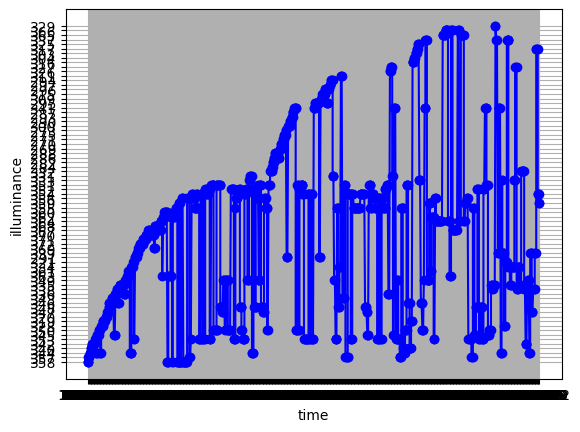

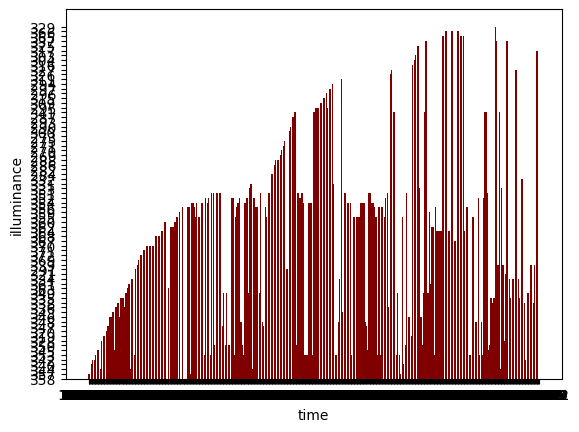

In [8]:
make_graph_simple(xAxis, yIlluminance, 'illuminance')

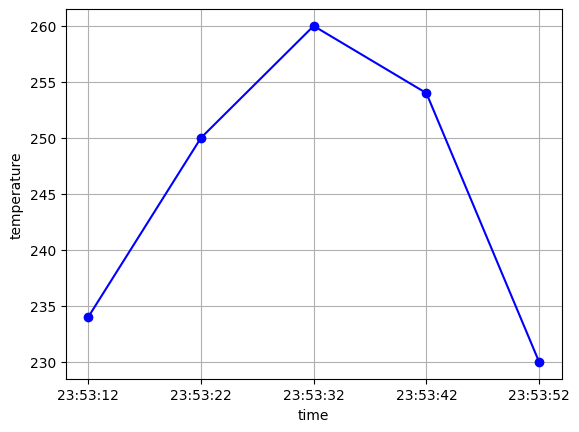

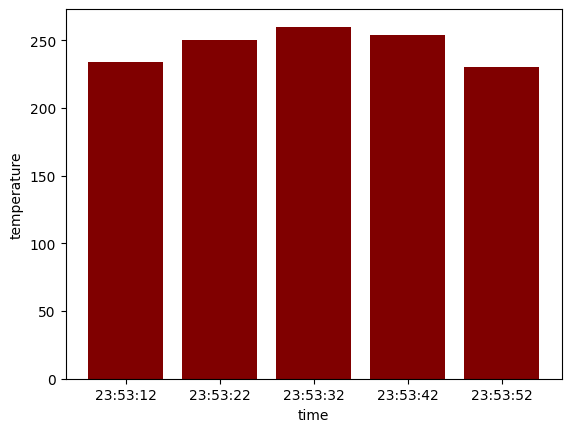

In [24]:
make_graph_simple(xAxis, yIlluminance, 'temperature')

In [ ]:
make_graph_simple(xAxis, yIlluminance, 'co2')

In [ ]:
make_graph_simple(xAxis, yIlluminance, 'Sound Level')